# Learning a simple 1 dimensional function using a NN

In this notebook I will demo a training process for learning a 1d function such as the sine function.

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, TimeDistributed, Input, Reshape, Conv2D
import numpy as np
import pandas as pd
from plotting import TrainingPlotFunc
import matplotlib.pylab as plt
plt.style.use("seaborn")

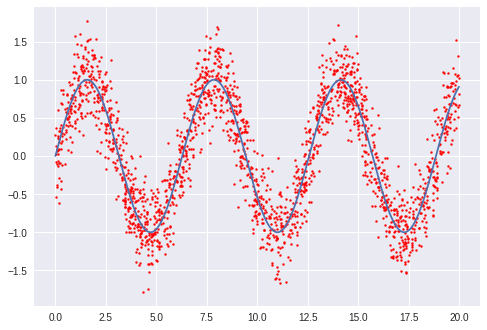

In [28]:
N=2000 # Number of training examples
R=20 # Interval length
noise = 0.3 # std of noise in training data
F = np.sin
#F = lambda x: np.sin(x+(x/5)**2)*(x/10+1) + x/5
X = np.sort(np.random.uniform(0,R,N))
Y = F(X) + np.random.normal(0,noise,N)

plt.plot(np.arange(0,R,0.01),F(np.arange(0,R,0.01)))
plt.scatter(X,Y,c='r',s=4)

As it turns out normalizing the input (the X) is extremely helpful. Try fitting the same function without normalizing (by uncommenting the commented out line below).

In [29]:
mean, std = X.mean(), X.std()
#mean, std = 0, 1
X1 = (X-mean)/std

# Validation. Used for plotting.
X_v = np.sort(np.random.uniform(0,R,1000))
Y_v = F(X_v)
X1_v = (X_v-mean)/std

In [30]:
h=100 #try: 10, 25 etc
activation = 'tanh' #try: 'sigmoid', 'relu' etc
dense = tf.keras.Sequential([
    Input(shape=(1)),
    Dense(h, activation=activation, name="Hidden"),
    Dense(h, activation=activation, name="Hidden1"),
    Dense(1, name="Out"),
],name='Dense')
dense.summary()

Model: "Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden (Dense)               (None, 100)               200       
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               10100     
_________________________________________________________________
Out (Dense)                  (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


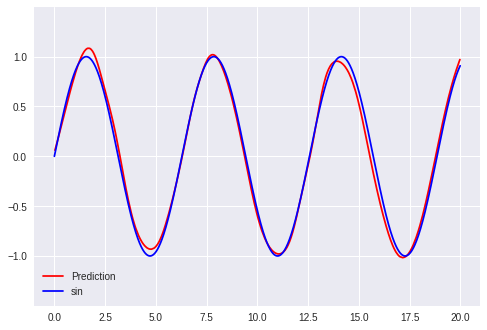

63/63 [==============================] - 0s 5ms/step - loss: 0.0949 - val_loss: 0.0042


In [32]:
dense.compile(loss='mse',optimizer='Adam')
dense.fit(X1,Y,epochs=100,verbose=1,callbacks=[TrainingPlotFunc(X1_v,R,F,mean,std,"")],validation_data=(X1_v,Y_v))

Try experimenting with different activation functions, and different number of layers and layer sizes.